# Analyse Wikis

### Load the data 

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 50)

wikis = pd.read_csv('2018_02_27_wikis.csv', low_memory=False)

wikis = wikis.assign(
    current_datetime=pd.to_datetime(wikis['current_date'] + ' ' + wikis['current_time']),
    full_datetime=pd.to_datetime(wikis['full_date'] + ' ' + wikis['full_time'])
)

#wikis.dtypes
wikis.head()

,id,title,url,wordmark,topUsers,headline,name,domain,hub,lang,topic,flags,desc,image,wam_score,stats_edits,stats_articles,stats_pages,stats_users,stats_activeUsers,stats_images,stats_videos,stats_admins,stats_discussions,current_dump_url,current_compression,current_date,current_time,full_dump_url,full_compression,full_date,full_time,current_datetime,full_datetime
0,93,Scouting,http://scouting.wikia.com/,NaN,[855103],NaN,Scouting,scouting.wikia.com,Lifestyle,en,Lifestyle,[],NaN,NaN,0.0000,3372,262,524,13676569,0,141,0,3,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sc/s...,7z,2017-04-08,07:00:08,http://s3.amazonaws.com/wikia_xml_dumps/s/sc/s...,7z,2017-04-08,07:00:08,2017-04-08 07:00:08,2017-04-08 07:00:08
1,67,GRIXML,http://grixml.wikia.com/,NaN,[],NaN,GRIXML,grixml.wikia.com,Lifestyle,en,Technology,[],NaN,NaN,0.0000,2108,107,131,10258752,0,0,0,1,1,http://s3.amazonaws.com/wikia_xml_dumps/g/gr/g...,7z,2017-04-08,06:30:06,http://s3.amazonaws.com/wikia_xml_dumps/g/gr/g...,7z,2017-04-08,06:30:06,2017-04-08 06:30:06,2017-04-08 06:30:06
2,77,San Diego,http://sandiego.wikia.com/,NaN,"[1929113, 30093946, 4261769, 4784321, 5811199]",NaN,San Diego,sandiego.wikia.com,Lifestyle,en,Travel,[],NaN,NaN,0.0000,2159,7,135,13676569,1,1,0,1,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sa/s...,7z,2017-04-08,08:20:04,http://s3.amazonaws.com/wikia_xml_dumps/s/sa/s...,7z,2017-04-08,08:20:04,2017-04-08 08:20:04,2017-04-08 08:20:04
3,92,Slekt og familier,http://slektami.wikia.com/,NaN,[],NaN,Slekt og familier,slektami.wikia.com,Lifestyle,no,Lifestyle,[],NaN,NaN,0.0000,2632,9,44,10258752,0,2,0,1,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sl/s...,7z,2017-04-08,06:50:06,http://s3.amazonaws.com/wikia_xml_dumps/s/sl/s...,7z,2017-04-08,06:50:06,2017-04-08 06:50:06,2017-04-08 06:50:06
4,74,Pokémon Wiki,http://pokemon.wikia.com/,https://img1.wikia.nocookie.net/__cb2014111316...,"[4435241, 4129195, 26573805, 8325863, 27158632...",Pokémon Wiki,Pokémon Wiki,pokemon.wikia.com,Games,en,Gaming,[],Pokémon is a multi-media franchise that's owne...,https://images.wikia.nocookie.net/__cb20160724...,98.2777,1035868,15000,144765,13839452,277,70894,49,11,11322,http://s3.amazonaws.com/wikia_xml_dumps/p/po/p...,7z,2017-04-08,07:44:20,http://s3.amazonaws.com/wikia_xml_dumps/p/po/p...,7z,2017-04-08,07:44:20,2017-04-08 07:44:20,2017-04-08 07:44:20


### General analysis

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
wikis.describe()

,id,wam_score,stats_edits,stats_articles,stats_pages,stats_users,stats_activeUsers,stats_images,stats_videos,stats_admins,stats_discussions
count,423963.000,423963.000,423963.000,423963.000,423963.000,423963.000,423963.000,423963.000,423963.000,423963.000,423963.000
mean,976530.447,0.734,1969.986,94.176,739.487,13604479.178,0.908,137.203,5.153,1.298,2.147
std,575725.651,5.905,73913.817,6504.948,18559.915,3932547.839,14.560,2374.136,258.202,1.344,259.624
min,1.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-14.000,0.000,0.000,0.000
25%,457847.500,0.000,113.000,4.000,99.000,10283456.000,0.000,1.000,0.000,1.000,0.000
50%,1070151.000,0.000,228.000,7.000,172.000,13764105.000,0.000,7.000,0.000,1.000,0.000
75%,1550042.500,0.000,333.000,18.000,243.000,15128409.000,1.000,22.000,0.000,1.000,1.000
max,1697940.000,99.808,29904749.000,2483173.000,6208066.000,24302450.000,6085.000,697937.000,122978.000,119.000,118652.000


In [3]:
wikis[['stats_edits', 'stats_articles', 'stats_pages', \
       'stats_activeUsers', 'stats_images', \
       'stats_videos', 'stats_discussions']].sum()

stats_edits          835201122
stats_articles        39927340
stats_pages          313515329
stats_activeUsers       385087
stats_images          58169120
stats_videos           2184546
stats_discussions       910084
dtype: int64

## Article count analysis

The log-log plot looks like this

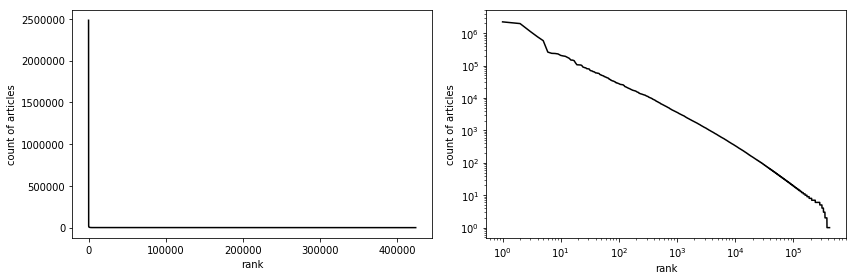

In [10]:
import matplotlib.pyplot as plt
article_count_sorted = wikis['stats_articles'].sort_values(ascending=False)

plt.figure(figsize=(12, 4)) 

plt.subplot(1, 2, 1)#plot the count of articles based on its rank
plt.plot(range(len(article_count_sorted)), article_count_sorted, color="black")
plt.xlabel('rank')
plt.ylabel('count of articles')

plt.subplot(1, 2, 2)#log log plot of article count
plt.loglog(range(len(article_count_sorted)), article_count_sorted, color="black")
plt.xlabel('rank')
plt.ylabel('count of articles')

plt.tight_layout()
plt.savefig('fig_article_counts.pdf')
plt.show()

Some top and bottom values:

In [5]:
article_count_sorted[:40]

10637     2483173
12483     2216232
14843     1963330
7083      1119314
120791     765039
30277      583411
50         259068
20         237229
131        234812
7304       227198
6318       204685
1482       197178
22638      192117
7774       178302
207        166759
194108     146869
91627      146608
141        140913
237642     119851
329        105346
309        104552
1542       103962
192        103640
44883      100754
84720       90179
2909        87877
43047       85476
49588       84510
28388       79774
37359       79490
38692       78506
43822       77641
36592       70799
12340       69088
13710       68400
13818       67368
73353       64566
1596        64452
138         63130
12149       61175
Name: stats_articles, dtype: int64

### Languages

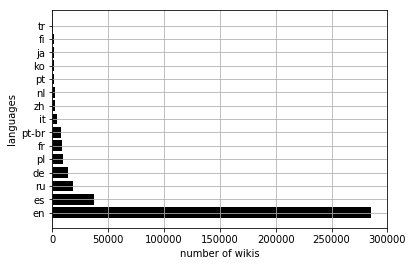

In [6]:
wiki_lang = wikis.groupby('lang').count().sort_values(by='id',ascending=False)[:15]

#plt.figure(figsize=(4,20)) 
plt.barh(range(len(wiki_lang)), wiki_lang['id'], color="black")
plt.yticks(range(len(wiki_lang)), wiki_lang.index)
plt.xlabel('number of wikis')
plt.ylabel('languages')
plt.grid()
plt.savefig('fig_full_languages.pdf')
plt.show()

In [7]:
# all languages
print(set(wikis['lang']))

{nan, 'te', 'ka', 'wa', 'no', 'ro', 'mk', 'qu', 'nap', 'la', 'bs', 'lzz', 'si', 'yi', 'ku', 'ru', 'bg', 'ta', 'th', 'tr', 'mg', 'new', 'sk', 'be', 'cy', 'tn', 'ny', 'oc', 'sco', 'ur', 'lzh', 'fo', 'ba', 'ch', 'li', 'io', 'rue', 'pag', 'sr-ec', 'kk-tr', 'ja', 'zea', 'bcc', 'mdf', 'am', 'gn', 'ca', 'ug', 'so', 'xh', 'om', 'et', 'nds-nl', 'vec', 'co', 'lb', 'hr', 'bo', 'pt-br', 'zh-yue', 'it', 'zh-tw', 'tw', 'gsw', 'tg', 'vls', 'gan-hans', 'ml', 'id', 'as', 'dtp', 'ps', 'gu', 'tk', 'map-bms', 'fy', 'gd', 'mi', 'ht', 'de', 'simple', 'nn', 'stq', 'yue', 'be-taras', 'inh', 'km', 'tg-cyrl', 'vi', 'bat-smg', 'is', 'scn', 'mu', 'be-x-old', 'arz', 'lv', 'ast', 'min', 'chr', 'prg', 'bn', 'ace', 'frp', 'ksh', 'zh-cn', 'ar', 'ss', 'gag', 'tpi', 'fi', 'wo', 'zh-hk', 'nso', 'kg', 'lad', 'anp', 'grc', 'wuu', 'ko', 'cs', 'mt', 'fa', 'cz', 'gl', 'ho', 'create.n', 'uz', 'cr', 'mo', 'vo', 'ang', 'sr', 'ko-kp', 'cv', 'zh-hant', 'hi', 'za', 'ha', 'rw', 'en', 'pie', 'tt-cyrl', 'su', 'eo', 'ia', 'lo', 'kr', '

### Hubs

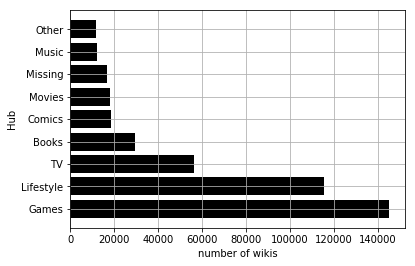

In [8]:
wiki_hub = wikis['hub'].fillna('Missing').value_counts()
plt.barh(range(len(wiki_hub)), wiki_hub, color='black')
plt.yticks(range(len(wiki_hub)), wiki_hub.index)
plt.grid()
plt.xlabel('number of wikis')
plt.ylabel('Hub')
plt.savefig("fig_full_hub.pdf")
plt.show()

### Topics

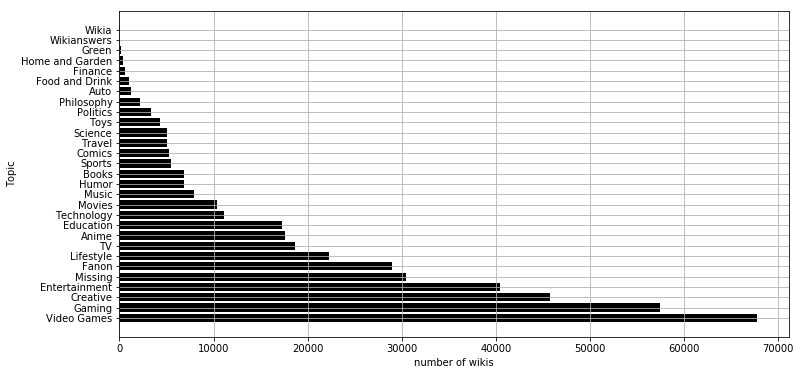

In [9]:
wiki_topic = wikis['topic'].fillna('Missing').value_counts()
plt.figure(figsize=(12,6))
plt.barh(range(len(wiki_topic)), wiki_topic, color='black')
plt.yticks(range(len(wiki_topic)), wiki_topic.index)
plt.grid()
plt.xlabel('number of wikis')
plt.ylabel('Topic')
plt.savefig("fig_full_topic.pdf")
plt.show()

### Is Topic and Hub functional or inverse-functional?

This could be helpful to draw (for example) a sunburst diagram

In [10]:
hubs = wikis['hub'].fillna('Missing')
topics = wikis['topic'].fillna('Missing')

for group, values in wikis.groupby('hub'):
    print("{} => {}".format(group, set(values['topic'])))
print("=======")
for group, values in wikis.groupby('topic'):
    print("{} => {}".format(group, set(values['hub'])))

Books => {nan, 'Humor', 'Books', 'Food and Drink', 'Auto', 'Lifestyle', 'Movies', 'Music', 'Sports', 'Wikianswers', 'Education', 'Entertainment', 'Philosophy', 'Video Games', 'Anime', 'Fanon', 'Comics', 'Science', 'TV', 'Technology', 'Creative', 'Travel', 'Politics', 'Toys', 'Gaming'}
Comics => {nan, 'Humor', 'Books', 'Food and Drink', 'Auto', 'Lifestyle', 'Movies', 'Music', 'Sports', 'Wikianswers', 'Home and Garden', 'Education', 'Entertainment', 'Philosophy', 'Video Games', 'Anime', 'Fanon', 'Comics', 'Science', 'TV', 'Technology', 'Creative', 'Travel', 'Politics', 'Toys', 'Gaming'}
Games => {nan, 'Finance', 'Humor', 'Books', 'Food and Drink', 'Auto', 'Lifestyle', 'Movies', 'Music', 'Sports', 'Wikianswers', 'Home and Garden', 'Education', 'Green', 'Entertainment', 'Philosophy', 'Video Games', 'Anime', 'Fanon', 'Comics', 'Science', 'TV', 'Technology', 'Creative', 'Travel', 'Politics', 'Toys', 'Gaming'}
Lifestyle => {nan, 'Finance', 'Humor', 'Books', 'Food and Drink', 'Auto', 'Lifestyl

### Wam score

- Wam score is an indicator of the strength and momentum of a FANDOM community
- calculated daily for the top 5,000 wiki sites 
- Links:
    - [http://www.wikia.com/WAM](http://www.wikia.com/WAM)
    - [http://www.wikia.com/WAM/FAQ](http://www.wikia.com/WAM/FAQ)

In [11]:
wikis.sort_values(by='wam_score', ascending=False)[['id', 'title', 'url', 'hub', 'topic', 'lang', 'stats_articles', 'wam_score']].head(n=40)

,id,title,url,hub,topic,lang,stats_articles,wam_score
246346,1254589,Dragon Ball Z Dokkan Battle Wikia,http://dbz-dokkanbattle.wikia.com/,Games,Video Games,en,2288,99.808
254,304,RuneScape Wiki,http://runescape.wikia.com/,Games,Gaming,en,41253,99.789
141,147,Wookieepedia,http://starwars.wikia.com/,Movies,Entertainment,en,140913,99.730
229,374,Disney Wiki,http://disney.wikia.com/,Movies,TV,en,44089,99.724
243743,1241752,Fate/Grand Order Wikia,http://fategrandorder.wikia.com/,Games,Video Games,en,3029,99.703
1482,2233,Marvel Database,http://marvel.wikia.com/,Comics,Comics,en,197178,99.683
120402,544934,WARFRAME Wiki,http://warframe.wikia.com/,Games,Gaming,en,3558,99.679
1154,1706,Elder Scrolls,http://elderscrolls.wikia.com/,Games,Gaming,en,59010,99.613
8510,14316,Wiki Drama,http://es.drama.wikia.com/,TV,TV,es,22006,99.591
145194,691244,Old School RuneScape Wiki,http://oldschoolrunescape.wikia.com/,Games,Gaming,en,19039,99.584


### Current datetime

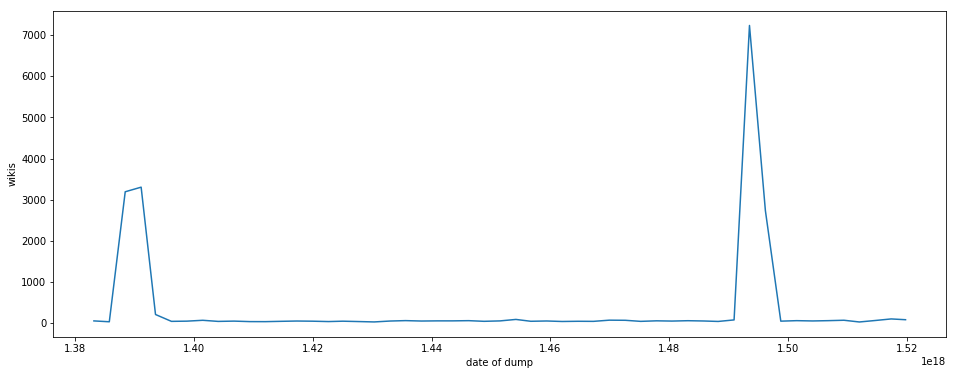

In [12]:
current_date = wikis.groupby(pd.Grouper(key='current_datetime', freq='M')).count()['id']
plt.figure(figsize=(16,6))
plt.plot(current_date.index, current_date)
plt.xlabel('date of dump')
plt.ylabel('wikis')
plt.savefig("fig_full_dump_dates.pdf")
plt.show()

# Analyse Wikis with dump url

In [13]:
wikis_with_dump = wikis[wikis['current_dump_url'].notnull()]
wikis_with_dump.head()

,id,title,url,wordmark,topUsers,headline,name,domain,hub,lang,topic,flags,desc,image,wam_score,stats_edits,stats_articles,stats_pages,stats_users,stats_activeUsers,stats_images,stats_videos,stats_admins,stats_discussions,current_dump_url,current_compression,current_date,current_time,full_dump_url,full_compression,full_date,full_time,current_datetime,full_datetime
0,93,Scouting,http://scouting.wikia.com/,NaN,[855103],NaN,Scouting,scouting.wikia.com,Lifestyle,en,Lifestyle,[],NaN,NaN,0.000,3372,262,524,13676569,0,141,0,3,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sc/s...,7z,2017-04-08,07:00:08,http://s3.amazonaws.com/wikia_xml_dumps/s/sc/s...,7z,2017-04-08,07:00:08,2017-04-08 07:00:08,2017-04-08 07:00:08
1,67,GRIXML,http://grixml.wikia.com/,NaN,[],NaN,GRIXML,grixml.wikia.com,Lifestyle,en,Technology,[],NaN,NaN,0.000,2108,107,131,10258752,0,0,0,1,1,http://s3.amazonaws.com/wikia_xml_dumps/g/gr/g...,7z,2017-04-08,06:30:06,http://s3.amazonaws.com/wikia_xml_dumps/g/gr/g...,7z,2017-04-08,06:30:06,2017-04-08 06:30:06,2017-04-08 06:30:06
2,77,San Diego,http://sandiego.wikia.com/,NaN,"[1929113, 30093946, 4261769, 4784321, 5811199]",NaN,San Diego,sandiego.wikia.com,Lifestyle,en,Travel,[],NaN,NaN,0.000,2159,7,135,13676569,1,1,0,1,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sa/s...,7z,2017-04-08,08:20:04,http://s3.amazonaws.com/wikia_xml_dumps/s/sa/s...,7z,2017-04-08,08:20:04,2017-04-08 08:20:04,2017-04-08 08:20:04
3,92,Slekt og familier,http://slektami.wikia.com/,NaN,[],NaN,Slekt og familier,slektami.wikia.com,Lifestyle,no,Lifestyle,[],NaN,NaN,0.000,2632,9,44,10258752,0,2,0,1,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sl/s...,7z,2017-04-08,06:50:06,http://s3.amazonaws.com/wikia_xml_dumps/s/sl/s...,7z,2017-04-08,06:50:06,2017-04-08 06:50:06,2017-04-08 06:50:06
4,74,Pokémon Wiki,http://pokemon.wikia.com/,https://img1.wikia.nocookie.net/__cb2014111316...,"[4435241, 4129195, 26573805, 8325863, 27158632...",Pokémon Wiki,Pokémon Wiki,pokemon.wikia.com,Games,en,Gaming,[],Pokémon is a multi-media franchise that's owne...,https://images.wikia.nocookie.net/__cb20160724...,98.278,1035868,15000,144765,13839452,277,70894,49,11,11322,http://s3.amazonaws.com/wikia_xml_dumps/p/po/p...,7z,2017-04-08,07:44:20,http://s3.amazonaws.com/wikia_xml_dumps/p/po/p...,7z,2017-04-08,07:44:20,2017-04-08 07:44:20,2017-04-08 07:44:20


In [14]:
wikis_with_dump.describe()

,id,wam_score,stats_edits,stats_articles,stats_pages,stats_users,stats_activeUsers,stats_images,stats_videos,stats_admins,stats_discussions
count,18823.000,18823.000,18823.000,18823.000,18823.000,18823.000,18823.000,18823.000,18823.000,18823.000,18823.000
mean,128333.724,6.734,25443.140,1039.042,7983.950,12055302.537,5.649,1475.946,47.730,2.366,22.913
std,303745.741,19.419,248929.008,26750.400,81945.103,3096043.000,59.225,10265.668,708.372,2.829,758.573
min,1.000,0.000,12.000,0.000,6.000,1077789.000,0.000,0.000,0.000,0.000,0.000
25%,7632.500,0.000,304.000,12.000,235.000,10258752.000,0.000,11.000,0.000,1.000,0.000
50%,18241.000,0.000,646.000,36.000,291.000,12372886.000,0.000,30.000,0.000,1.000,0.000
75%,70629.000,0.767,3233.000,193.000,972.000,13839452.000,1.000,214.000,2.000,3.000,1.000
max,1696503.000,99.789,21431528.000,2483173.000,6208066.000,24297096.000,6085.000,697937.000,80622.000,66.000,75891.000


In [15]:
wikis_with_dump[['stats_edits', 'stats_articles', 'stats_pages', \
       'stats_activeUsers', 'stats_images', \
       'stats_videos', 'stats_discussions']].sum()

stats_edits          478916223
stats_articles        19557889
stats_pages          150281882
stats_activeUsers       106339
stats_images          27781725
stats_videos            898413
stats_discussions       431296
dtype: int64

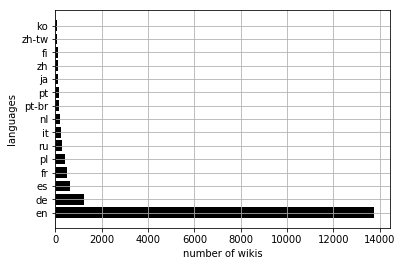

In [16]:
wiki_lang = wikis_with_dump.groupby('lang').count().sort_values(by='id',ascending=False)[:15]

plt.barh(range(len(wiki_lang)), wiki_lang['id'], color="black")
plt.yticks(range(len(wiki_lang)), wiki_lang.index)
plt.xlabel('number of wikis')
plt.ylabel('languages')
plt.grid()
plt.savefig('fig_dump_languages.pdf')
plt.show()

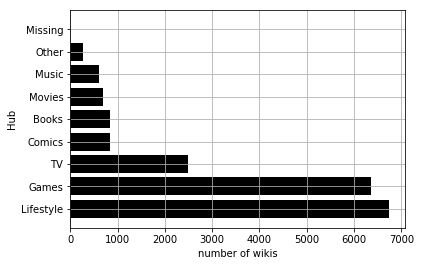

In [17]:
wiki_hub = wikis_with_dump['hub'].fillna('Missing').value_counts()
plt.barh(range(len(wiki_hub)), wiki_hub, color='black')
plt.yticks(range(len(wiki_hub)), wiki_hub.index)
plt.grid()
plt.xlabel('number of wikis')
plt.ylabel('Hub')
plt.savefig("fig_dump_hub.pdf")
plt.show()

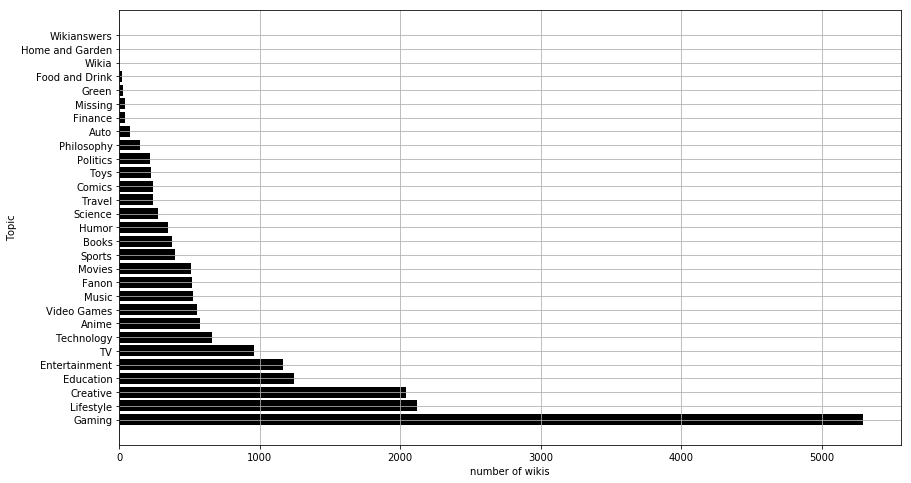

In [18]:
wiki_topic = wikis_with_dump['topic'].fillna('Missing').value_counts()
plt.figure(figsize=(14,8))
plt.barh(range(len(wiki_topic)), wiki_topic, color='black')
plt.yticks(range(len(wiki_topic)), wiki_topic.index)
plt.grid()
plt.xlabel('number of wikis')
plt.ylabel('Topic')
plt.savefig("fig_dump_topic.pdf")
plt.show()

# Analyse Wikis with downloadable dump

In [6]:
import glob
import os
list_of_ids = [os.path.basename(wiki_file).split('~')[0] for wiki_file in glob.glob('D:\\2018_01_31_results_dbkwik_uni_run\\dbkwik-v1.0\\*.tar.gz')] 
wikis_with_downloaded_dump = wikis[wikis['id'].isin(list_of_ids)]
wikis_with_downloaded_dump.head()

,id,title,url,wordmark,topUsers,headline,name,domain,hub,lang,topic,flags,desc,image,wam_score,stats_edits,stats_articles,stats_pages,stats_users,stats_activeUsers,stats_images,stats_videos,stats_admins,stats_discussions,current_dump_url,current_compression,current_date,current_time,full_dump_url,full_compression,full_date,full_time,current_datetime,full_datetime
0,93,Scouting,http://scouting.wikia.com/,NaN,[855103],NaN,Scouting,scouting.wikia.com,Lifestyle,en,Lifestyle,[],NaN,NaN,0.0000,3372,262,524,13676569,0,141,0,3,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sc/s...,7z,2017-04-08,07:00:08,http://s3.amazonaws.com/wikia_xml_dumps/s/sc/s...,7z,2017-04-08,07:00:08,2017-04-08 07:00:08,2017-04-08 07:00:08
1,67,GRIXML,http://grixml.wikia.com/,NaN,[],NaN,GRIXML,grixml.wikia.com,Lifestyle,en,Technology,[],NaN,NaN,0.0000,2108,107,131,10258752,0,0,0,1,1,http://s3.amazonaws.com/wikia_xml_dumps/g/gr/g...,7z,2017-04-08,06:30:06,http://s3.amazonaws.com/wikia_xml_dumps/g/gr/g...,7z,2017-04-08,06:30:06,2017-04-08 06:30:06,2017-04-08 06:30:06
2,77,San Diego,http://sandiego.wikia.com/,NaN,"[1929113, 30093946, 4261769, 4784321, 5811199]",NaN,San Diego,sandiego.wikia.com,Lifestyle,en,Travel,[],NaN,NaN,0.0000,2159,7,135,13676569,1,1,0,1,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sa/s...,7z,2017-04-08,08:20:04,http://s3.amazonaws.com/wikia_xml_dumps/s/sa/s...,7z,2017-04-08,08:20:04,2017-04-08 08:20:04,2017-04-08 08:20:04
3,92,Slekt og familier,http://slektami.wikia.com/,NaN,[],NaN,Slekt og familier,slektami.wikia.com,Lifestyle,no,Lifestyle,[],NaN,NaN,0.0000,2632,9,44,10258752,0,2,0,1,0,http://s3.amazonaws.com/wikia_xml_dumps/s/sl/s...,7z,2017-04-08,06:50:06,http://s3.amazonaws.com/wikia_xml_dumps/s/sl/s...,7z,2017-04-08,06:50:06,2017-04-08 06:50:06,2017-04-08 06:50:06
4,74,Pokémon Wiki,http://pokemon.wikia.com/,https://img1.wikia.nocookie.net/__cb2014111316...,"[4435241, 4129195, 26573805, 8325863, 27158632...",Pokémon Wiki,Pokémon Wiki,pokemon.wikia.com,Games,en,Gaming,[],Pokémon is a multi-media franchise that's owne...,https://images.wikia.nocookie.net/__cb20160724...,98.2777,1035868,15000,144765,13839452,277,70894,49,11,11322,http://s3.amazonaws.com/wikia_xml_dumps/p/po/p...,7z,2017-04-08,07:44:20,http://s3.amazonaws.com/wikia_xml_dumps/p/po/p...,7z,2017-04-08,07:44:20,2017-04-08 07:44:20,2017-04-08 07:44:20


In [7]:
wikis_with_downloaded_dump.describe()

,id,wam_score,stats_edits,stats_articles,stats_pages,stats_users,stats_activeUsers,stats_images,stats_videos,stats_admins,stats_discussions
count,1.242400e+04,12424.000000,1.242400e+04,1.242400e+04,1.242400e+04,1.242400e+04,12424.000000,12424.000000,12424.000000,12424.000000,12424.000000
mean,2.149522e+05,8.109908,3.140379e+04,1.186691e+03,8.997150e+03,1.252255e+07,7.156793,1686.960963,46.255232,2.547569,28.975773
std,4.660631e+05,21.253996,2.976279e+05,2.614300e+04,9.227198e+04,3.358354e+06,72.677846,11358.719849,379.136477,2.929116,887.869121
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.045750e+03,0.000000,3.140000e+02,1.000000e+01,1.720000e+02,1.025875e+07,0.000000,10.000000,0.000000,1.000000,0.000000
50%,1.032750e+04,0.000000,9.900000e+02,4.300000e+01,2.950000e+02,1.368891e+07,0.000000,35.000000,0.000000,2.000000,0.000000
75%,1.829850e+04,1.712225,4.416750e+03,2.540000e+02,1.290000e+03,1.383945e+07,2.000000,297.250000,3.000000,3.000000,1.000000
max,1.648312e+06,99.788700,2.143153e+07,2.483173e+06,6.208066e+06,2.429710e+07,6085.000000,697937.000000,21546.000000,65.000000,75891.000000


In [8]:
wikis_with_downloaded_dump[['stats_edits', 'stats_articles', 'stats_pages', \
       'stats_activeUsers', 'stats_images', \
       'stats_videos', 'stats_discussions']].sum()

stats_edits          390160656
stats_articles        14743443
stats_pages          111780588
stats_activeUsers        88916
stats_images          20958803
stats_videos            574675
stats_discussions       359995
dtype: int64

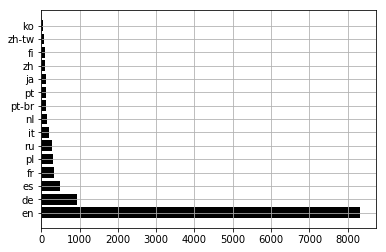

In [25]:
wiki_lang = wikis_with_downloaded_dump.groupby('lang').count().sort_values(by='id',ascending=False)[:15]

plt.barh(range(len(wiki_lang)), wiki_lang['id'], color="black")
plt.yticks(range(len(wiki_lang)), wiki_lang.index)
#plt.xlabel('number of wikis')
#plt.ylabel('languages')
plt.grid()
plt.savefig('fig_dump_avail_languages.pdf')
plt.show()

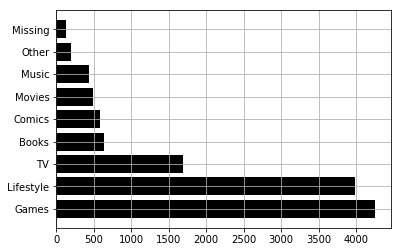

In [24]:
wiki_hub = wikis_with_downloaded_dump['hub'].fillna('Missing').value_counts()
plt.barh(range(len(wiki_hub)), wiki_hub, color='black')
plt.yticks(range(len(wiki_hub)), wiki_hub.index)
plt.grid()
#plt.xlabel('number of wikis')
#plt.ylabel('Hub')
plt.savefig("fig_dump_avail_hub.pdf")
plt.show()

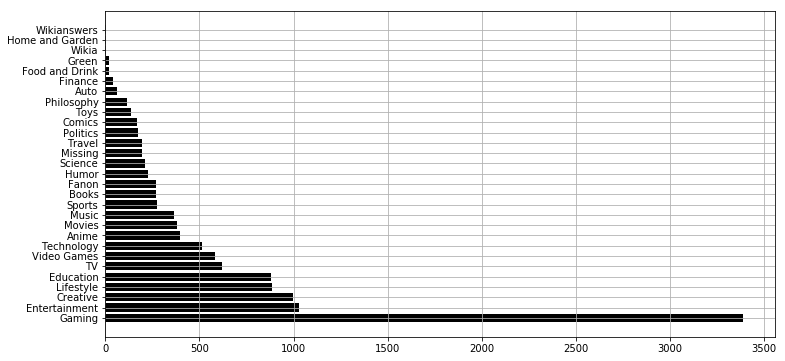

In [23]:
wiki_topic = wikis_with_downloaded_dump['topic'].fillna('Missing').value_counts()
plt.figure(figsize=(12,6))
plt.barh(range(len(wiki_topic)), wiki_topic, color='black')
plt.yticks(range(len(wiki_topic)), wiki_topic.index)
plt.grid()
#plt.xlabel('number of wikis')
#plt.ylabel('Topic')
plt.savefig("fig_dump_avail_topic.pdf")
plt.show()